# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + '&q=' + cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | jiazi
Processing Record 3 of Set 1 | lotofaga
Processing Record 4 of Set 1 | agadir
Processing Record 5 of Set 1 | maykain
City not found. Skipping...
Processing Record 6 of Set 1 | baruun-urt
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | morris
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | bogatic
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | pihuamo
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | lewistown
Processing Record 21 of Set 1 | northam
P

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,34.95,99,0,5.75,US,2023-02-06 10:49:39
1,jiazi,22.8779,116.0670,64.58,90,85,7.11,CN,2023-02-06 10:51:37
2,lotofaga,-13.9764,-171.8578,78.58,74,90,9.53,WS,2023-02-06 10:51:37
3,agadir,30.4202,-9.5982,61.25,35,4,1.97,MA,2023-02-06 10:51:37
4,baruun-urt,46.6806,113.2792,0.30,88,95,2.59,MN,2023-02-06 10:51:38


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,34.95,99,0,5.75,US,2023-02-06 10:49:39
1,jiazi,22.8779,116.0670,64.58,90,85,7.11,CN,2023-02-06 10:51:37
2,lotofaga,-13.9764,-171.8578,78.58,74,90,9.53,WS,2023-02-06 10:51:37
3,agadir,30.4202,-9.5982,61.25,35,4,1.97,MA,2023-02-06 10:51:37
4,baruun-urt,46.6806,113.2792,0.30,88,95,2.59,MN,2023-02-06 10:51:38


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

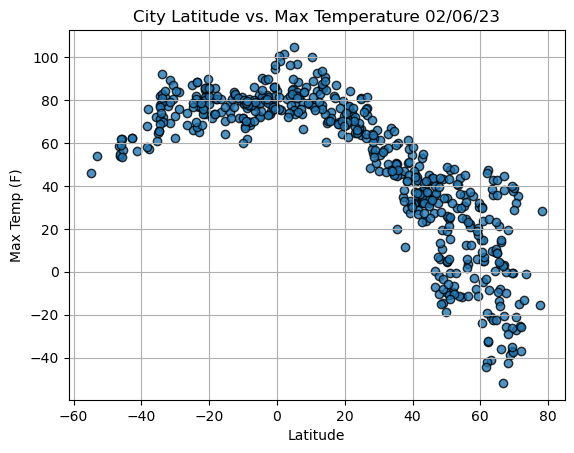

In [33]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

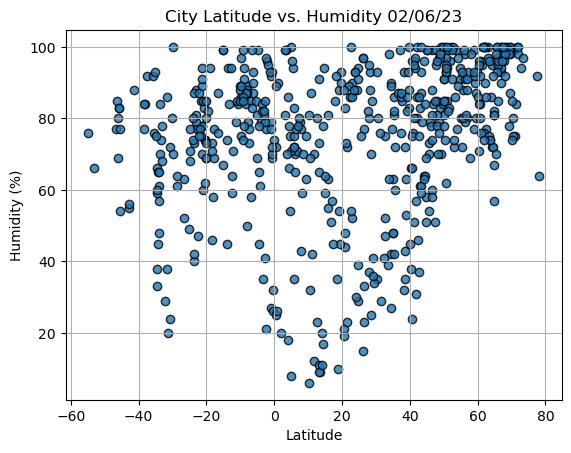

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

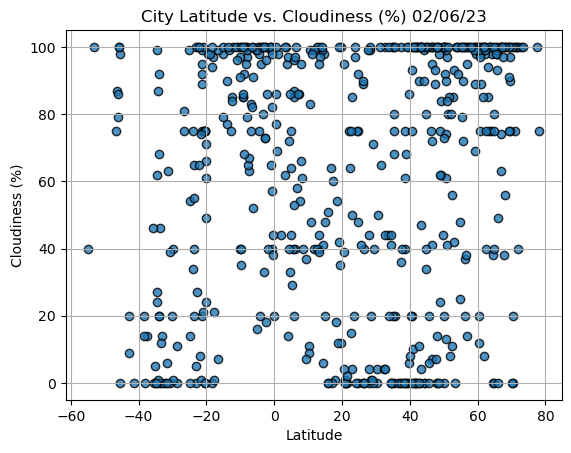

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

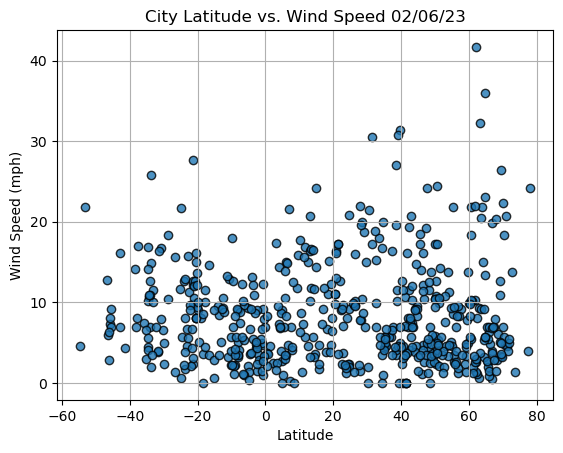

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,34.95,99,0,5.75,US,2023-02-06 10:49:39
1,jiazi,22.8779,116.0670,64.58,90,85,7.11,CN,2023-02-06 10:51:37
3,agadir,30.4202,-9.5982,61.25,35,4,1.97,MA,2023-02-06 10:51:37
4,baruun-urt,46.6806,113.2792,0.30,88,95,2.59,MN,2023-02-06 10:51:38
5,qaanaaq,77.4840,-69.3632,-15.50,92,100,4.00,GL,2023-02-06 10:51:38


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lotofaga,-13.9764,-171.8578,78.58,74,90,9.53,WS,2023-02-06 10:51:37
7,punta arenas,-53.1500,-70.9167,53.71,66,100,21.85,CL,2023-02-06 10:49:09
9,mataura,-46.1927,168.8643,53.89,80,79,2.82,NZ,2023-02-06 10:51:40
13,bluff,-46.6000,168.3333,58.42,77,75,12.77,NZ,2023-02-06 10:51:41
14,castro,-24.7911,-50.0119,65.79,68,54,0.63,BR,2023-02-06 10:51:42


###  Temperature vs. Latitude Linear Regression Plot

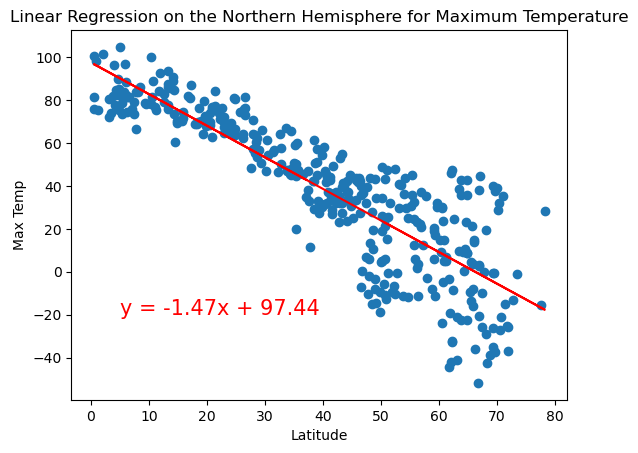

The p-value is: 0.000
The r-value is: -0.864


In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(5,-20))

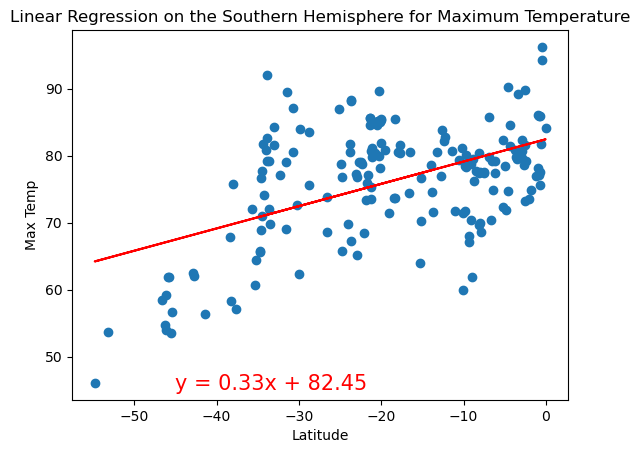

The p-value is: 0.000
The r-value is: 0.507


In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

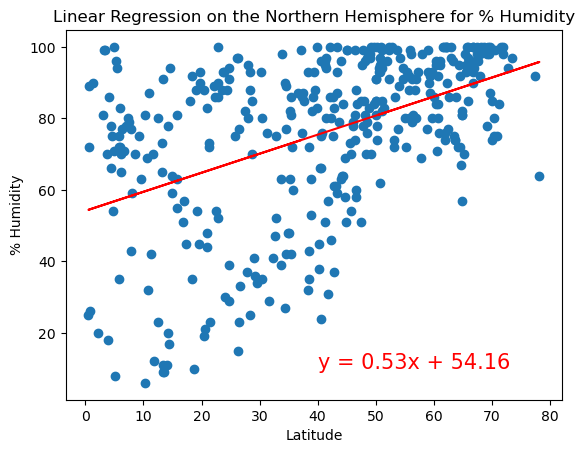

The p-value is: 0.000
The r-value is: 0.468


In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',
                       (40,10))

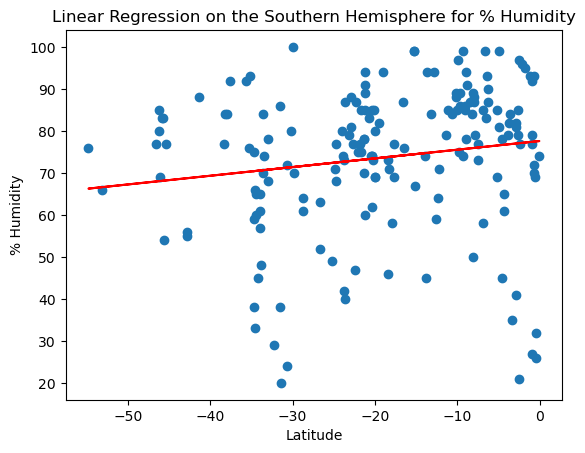

The p-value is: 0.036
The r-value is: 0.158


In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

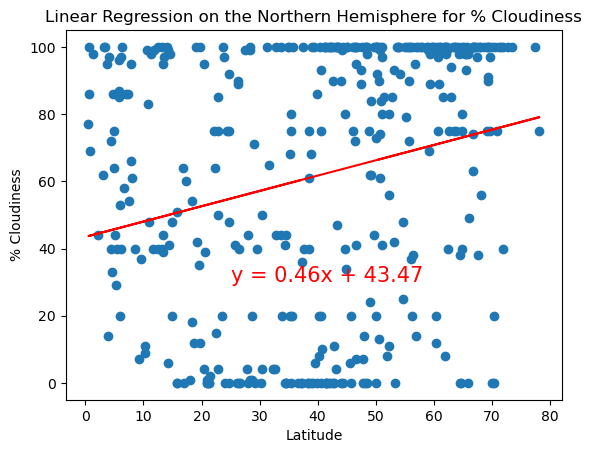

The p-value is: 0.000
The r-value is: 0.239


In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

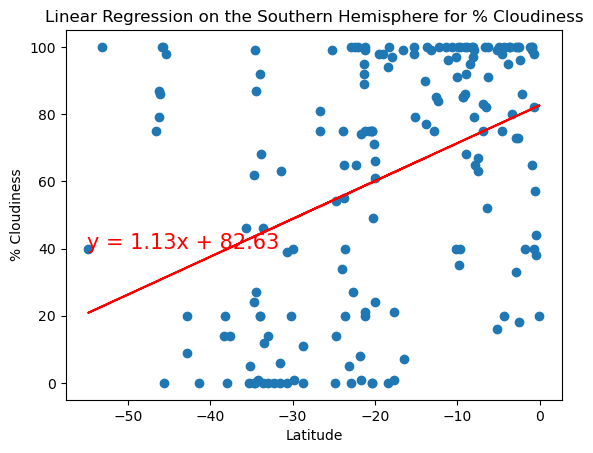

The p-value is: 0.000
The r-value is: 0.406


In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

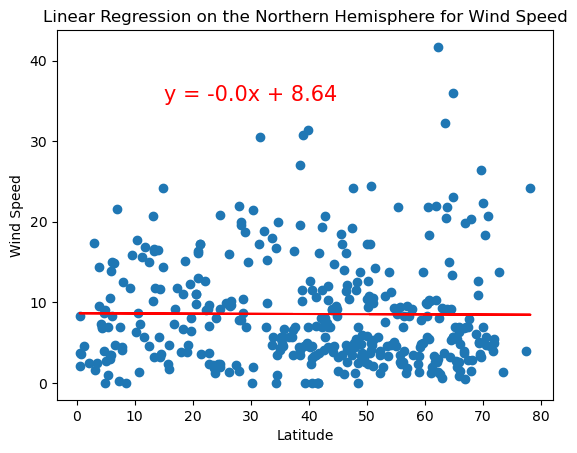

The p-value is: 0.894
The r-value is: -0.007


In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',
                       (15,35))

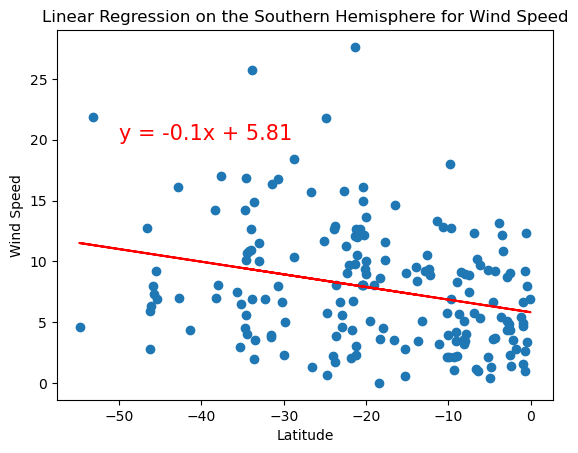

The p-value is: 0.000
The r-value is: -0.278


In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:**
<!-- northern hemisphere for maximum temperature: negative slope, closer you are to 0 latitute (equator) the maximum temp is higher

southern hemisphere for maximum temperature: positive slope, closer you are to the equator the maximum temp is higher

northern hemisphere for humidity: less humid when reaching the 0 latitute

southern hemisphere for humidity: more humid when reaching the 0 latitude

northern hemisphere for cloudiness: positive slope, showing that it is less cloudy closer to the equator in the northern hemisphere

southern hemisphere for cloudiness: positive slope, showing that it is more cloudy as you get closer to the equator

northern hemisphere for windspeed: the slope seems to be pretty horizontal, meaning that windspeed is barely noticable when closer or further from the equator

southern hemisphere for windspeed: negative slope, meaning that closer you are to the equator, the lower windspeed in the southern hemisphere -->